In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
norway = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/New%20Car%20Sales%20in%20Norway/norway_new_car_sales_by_model.csv",encoding="latin-1")

In [3]:
norway.head()

,Year,Month,Make,Model,Quantity,Pct
0,2007,1,Volkswagen,Volkswagen Passat,1267,10.0
1,2007,1,Toyota,Toyota Rav4,819,6.5
2,2007,1,Toyota,Toyota Avensis,787,6.2
3,2007,1,Volkswagen,Volkswagen Golf,720,5.7
4,2007,1,Toyota,Toyota Corolla,691,5.4


In [4]:
norway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      2694 non-null   int64  
 1   Month     2694 non-null   int64  
 2   Make      2694 non-null   object 
 3   Model     2694 non-null   object 
 4   Quantity  2694 non-null   int64  
 5   Pct       2694 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 126.4+ KB


In [5]:
all_data_na = (norway.isnull().sum() / len(norway)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


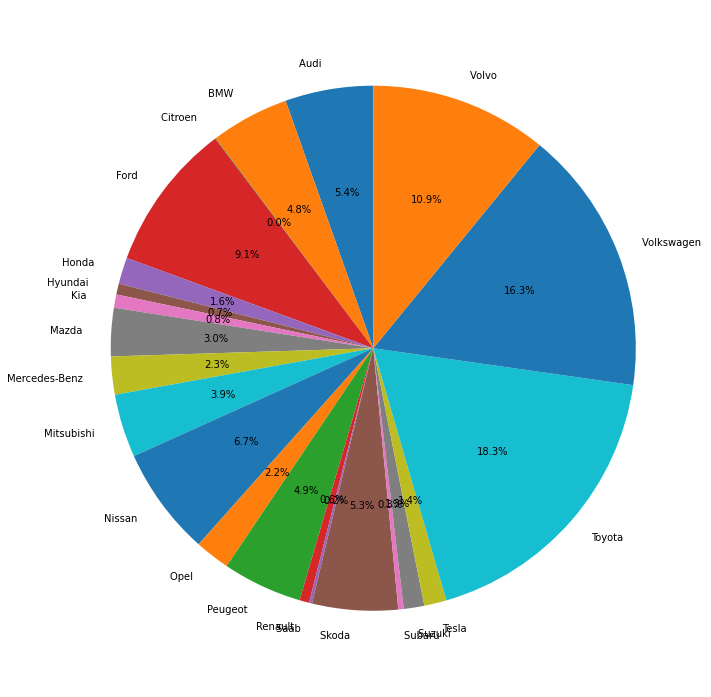

In [6]:
norway["Make"]=norway["Make"].str.replace('\xa0Mercedes-Benz ','Mercedes-Benz ')
makes = norway.groupby(['Make']).count().index
sizes = norway.groupby(['Make']).count()['Quantity']


fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=makes, autopct='%1.1f%%',
        shadow=False,  startangle=90)
ax.axis('equal')  
sizes
plt.tight_layout()

In [7]:
norway.Make=norway.Make.str.lower()
norway.Model=norway.Model.str.lower()
monthly_total_sales=norway.pivot_table("Quantity",index="Year",aggfunc="sum")
print(monthly_total_sales.mean(axis=1))

Year
2007    69749.0
2008    57789.0
2009    49373.0
2010    61572.0
2011    64009.0
2012    66150.0
2013    76770.0
2014    72234.0
2015    78947.0
2016    93016.0
2017     6834.0
dtype: float64


<AxesSubplot:xlabel='Year'>

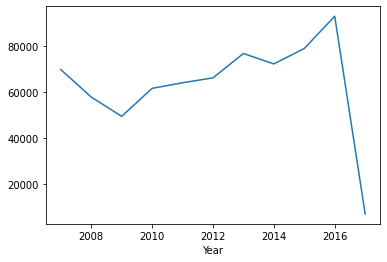

In [8]:
monthly_total_sales.mean(axis=1).plot.line()

In [9]:
norway.Make=norway.Make.str.lower()
norway.Model=norway.Model.str.lower()
monthly_total_sales=norway.pivot_table("Quantity",index="Month",columns="Year",aggfunc="sum")
print(monthly_total_sales.mean(axis=1))

Month
1     6008.272727
2     5364.900000
3     6406.000000
4     6130.300000
5     5866.800000
6     5647.500000
7     5964.000000
8     5177.100000
9     5542.800000
10    5613.900000
11    5598.800000
12    5723.100000
dtype: float64


<AxesSubplot:xlabel='Month'>

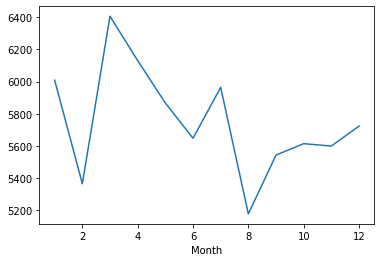

In [10]:
monthly_total_sales.mean(axis=1).plot.line()

In [11]:
make_total = norway.pivot_table("Quantity",index=['Make'],aggfunc='sum')
top10make=make_total.sort_values(by='Quantity',ascending=False)[:10]
print(top10make)

             Quantity
Make                 
volkswagen     170687
toyota         134656
volvo           71558
ford            57763
nissan          47581
skoda           36823
mitsubishi      29118
audi            28691
bmw             22965
peugeot         22572


<AxesSubplot:xlabel='Make'>

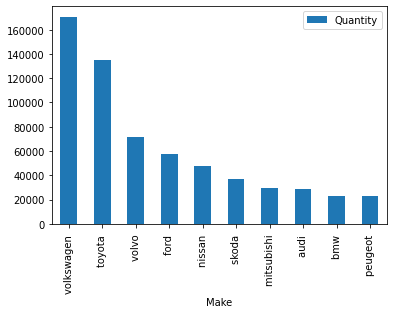

In [12]:
top10make.plot.bar()

In [13]:
maketotal_1 = norway.pivot_table(values='Quantity',index=['Month','Model','Make'],aggfunc=np.std)
df1 = maketotal_1.reset_index().dropna(subset=['Quantity'])
df2 = df1.loc[df1.groupby('Make')['Quantity'].idxmax()]
for index,row in df2.iterrows():
    print("For Manufacturer",row['Make'],"model",row['Model'],"has the highest yearly fluncation.")

For Manufacturer audi  model audi a3 has the highest yearly fluncation.
For Manufacturer bmw  model bmw i3 has the highest yearly fluncation.
For Manufacturer ford  model ford mondeo has the highest yearly fluncation.
For Manufacturer honda  model honda cr-v has the highest yearly fluncation.
For Manufacturer hyundai  model hyundai ix35 has the highest yearly fluncation.
For Manufacturer kia  model kia sportage has the highest yearly fluncation.
For Manufacturer mazda  model mazda cx-5 has the highest yearly fluncation.
For Manufacturer mercedes-benz  model mercedes-benz glc has the highest yearly fluncation.
For Manufacturer mitsubishi  model mitsubishi asx has the highest yearly fluncation.
For Manufacturer nissan  model nissan leaf has the highest yearly fluncation.
For Manufacturer opel  model opel astra has the highest yearly fluncation.
For Manufacturer peugeot  model peugeot 207 has the highest yearly fluncation.
For Manufacturer renault  model renault zoe has the highest yearly